# `Arya Chakraborty `
- 22MSD7020
- VIT-AP
- [Gmail](aryachakraborty.official@gmail.com)

# `CIPLA stock Price Prediction Modelling using the following Models`
- `ARMA`
- `ARMA-ANN`
- `GARCH`
- `ARMA-GARCH`
- `ARMA-GARCH-ANN`
- `FUZZY CLUSTERING-ARMA`
- `L.S.T.M`

> ## `Importing required libraries`

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm                            # For ARIMA/ARMA/SARIMAX Modelling
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
from pandas_datareader import data as pdr               # For fetching the Data from YahooFinance
import yfinance as yfin
yfin.pdr_override()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras                            # For LSTM Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

import arch                                             # For AARCH/GARCH Modelling

import skfuzzy as fuzz                                  # For FUZZY Clustering
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error, mean_absolute_error # Error Metrices# Error Metrices


## `Collecting the Data` 

In [2]:
main_data=pdr.get_data_yahoo('CIPLA.NS',start='2010-06-29',end='2023-08-27')
main_data=main_data.reset_index()
main_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,348.399994,348.399994,340.000000,340.600006,314.235565,491114
1,2010-06-30,338.000000,341.700012,334.350006,338.500000,312.298126,1223210
2,2010-07-01,338.000000,339.799988,334.549988,335.250000,309.299744,417953
3,2010-07-02,334.500000,338.799988,334.500000,336.799988,310.729645,348768
4,2010-07-05,338.000000,342.899994,336.049988,337.299988,311.191010,711437
...,...,...,...,...,...,...,...
3245,2023-08-21,1237.449951,1245.300049,1230.300049,1233.800049,1233.800049,1101408
3246,2023-08-22,1233.800049,1240.250000,1218.050049,1221.000000,1221.000000,1379445
3247,2023-08-23,1252.050049,1259.900024,1225.050049,1230.650024,1230.650024,2562635
3248,2023-08-24,1235.199951,1239.650024,1217.000000,1220.500000,1220.500000,848018


In [3]:
main_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,348.399994,348.399994,340.000000,340.600006,314.235565,491114
1,2010-06-30,338.000000,341.700012,334.350006,338.500000,312.298126,1223210
2,2010-07-01,338.000000,339.799988,334.549988,335.250000,309.299744,417953
3,2010-07-02,334.500000,338.799988,334.500000,336.799988,310.729645,348768
4,2010-07-05,338.000000,342.899994,336.049988,337.299988,311.191010,711437
...,...,...,...,...,...,...,...
3245,2023-08-21,1237.449951,1245.300049,1230.300049,1233.800049,1233.800049,1101408
3246,2023-08-22,1233.800049,1240.250000,1218.050049,1221.000000,1221.000000,1379445
3247,2023-08-23,1252.050049,1259.900024,1225.050049,1230.650024,1230.650024,2562635
3248,2023-08-24,1235.199951,1239.650024,1217.000000,1220.500000,1220.500000,848018


*Here We are considering only the Closing Price*

In [4]:
date = main_data.Date
close=main_data.Close

> # `ARMA MODEL`

## Unique Root Test using ADF Test

Training and Testing data

In [20]:
arma_train_data = close[ : int(0.8*len(close))]
arma_test_data = close[int(0.8* len(close)) : ]

In [21]:
return_values = close.pct_change().dropna() 

In [22]:
arma_train_return_val = arma_train_data.pct_change().dropna() 

In [23]:
def adfuller_test(sales):
                result=adfuller(sales)
                labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
                for value,label in zip(result,labels):
                        print((label+' : '+str(value) ))
                if result[1] <= 0.05:
                        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
                else:
                        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

print(adfuller_test(arma_train_data))
print("<------------------------------------------------------------------------------------------------------------------------------------->")
print(adfuller_test(arma_train_return_val))

ADF Test Statistic : -0.7412598519326689
p-value : 0.8357709614172433
#Lags Used : 1
Number of Observations Used : 2598
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
<------------------------------------------------------------------------------------------------------------------------------------->
ADF Test Statistic : -52.37068730831057
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2598
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
None


**Using AutoArima**

In [24]:
arma_order = auto_arima(arma_train_return_val, seasonal=False, trace=True, suppress_warnings=True).order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-13885.466, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13891.588, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13891.463, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13891.457, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13889.464, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-13891.858, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13891.859, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-13889.858, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13889.858, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13891.856, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-13887.858, Time=0.83 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.047 seconds


According to Minimum AIC Criterion `(1,0,0)` is the best fit

In [25]:
arma_order = (1, 0, 0)  
arma_model = sm.tsa.arima.ARIMA(arma_train_return_val, order=arma_order)
arma_results = arma_model.fit()

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
arma_predictions = arma_results.predict(start=len(arma_train_return_val), end=len(arma_train_return_val) + len(arma_test_data) - 1)

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
original_predicted_prices = np.mean(close.values) * (1 + arma_predictions).cumprod()

In [54]:
arma_mse = mean_squared_error(arma_test_data, original_predicted_prices)
arma_mae =  mean_absolute_error(arma_test_data, original_predicted_prices)

# Step 5: Calculate RMSE
arma_rmse = np.sqrt(arma_mse)

creating the Metrics DataFrame

In [52]:
original_predicted_prices

2599    340.567783
2600    340.741012
2601    340.908624
2602    341.076477
2603    341.244408
           ...    
3244    467.837759
3245    468.068102
3246    468.298558
3247    468.529128
3248    468.759811
Name: predicted_mean, Length: 650, dtype: float64

In [55]:
Metrics_DF = pd.DataFrame({"Model Name": ['ARMA(1,0,1)'],
                        "RMSE": [arma_rmse],
                        "MSE": [arma_mse],
                        "MAE": [arma_mae]})
Metrics_DF

,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",281.61564,79307.368515,271.644106


In [49]:
residual = arma_results.resid

In [50]:
Xt_1 = return_values.shift(1)
Xt_2 = return_values.shift(2)


# Lagged Values of the Residuals
et_1 = residual.shift(1)
et_2 = residual.shift(2)

In [51]:
data = pd.DataFrame({"Date": date[1:],
                            "Xt_1": Xt_1,
                            "Xt_2": Xt_2,
                            "et_1": et_1,
                            "et_2": et_2,
                            "Yt": return_values
                                 })
data.dropna(inplace=True)

data

,Date,Xt_1,Xt_2,et_1,et_2,Yt
3,2010-07-02,-0.009601,-0.006166,-0.010278,-0.006658,0.004623
4,2010-07-05,0.004623,-0.009601,0.003851,-0.010278,0.001485
5,2010-07-06,0.001485,0.004623,0.001107,0.003851,0.004744
6,2010-07-07,0.004744,0.001485,0.004279,0.001107,-0.012541
7,2010-07-08,-0.012541,0.004744,-0.012915,0.004279,0.014343
...,...,...,...,...,...,...
2595,2021-01-05,0.006835,0.008110,0.006554,0.007474,-0.006008
2596,2021-01-06,-0.006008,0.006835,-0.006324,0.006554,-0.002962
2597,2021-01-07,-0.002962,-0.006008,-0.003634,-0.006324,0.002122
2598,2021-01-08,0.002122,-0.002962,0.001534,-0.003634,0.014700


In [12]:
X = data[["Xt_1","Xt_2","et_1","et_2"]]
y = data['Yt']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:

train_size = int(0.8 * len(X))  

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

C:\Users\chakr\AppData\Local\Temp\ipykernel_10660\2808417156.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train, y_test = y[:train_size], y[train_size:]
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
73/73 [==============================] - 2s 6ms/step - loss: 0.0013 - val_loss: 6.9168e-04
Epoch 2/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5870e-04 - val_loss: 6.6958e-04
Epoch 3/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5238e-04 - val_loss: 6.6481e-04
Epoch 4/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5365e-04 - val_loss: 6.6342e-04
Epoch 5/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5653e-04 - val_loss: 6.5486e-04
Epoch 6/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5518e-04 - val_loss: 6.4672e-04
Epoch 7/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5268e-04 - val_loss: 6.4635e-04
Epoch 8/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5345e-04 - val_loss: 6.4976e-04
Epoch 9/50
73/73 [==============================] - 0s 3ms/step - loss: 2.5452e-04 - val_loss: 6.9869e-04
Epoch 10/50
73/73 [==============================]

In [16]:
new_data = np.array([[-0.014049,0.034767,-0.015659,0.033157]])
new_data = scaler.transform(new_data)  
prediction = model.predict(new_data)
print("Predicted Value:", prediction[0][0])

1/1 [==============================] - ETA: 0s

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 147ms/step
Predicted Value: 0.0012171408


In [17]:
y_pred = model.predict(X_test)


arma_ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", arma_ann_rmse)

# Calculate MAE
arma_ann_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", arma_ann_mae)

arma_ann_mse = arma_ann_rmse**2

21/21 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 0.01481493100577819
Mean Absolute Error (MAE): 0.010794527250869879


In [18]:
Metrics_DF= Metrics_DF.append({"Model Name":'ARMA_ANN',
                        "RMSE": arma_ann_rmse,
                        "MSE": arma_ann_mse,
                        "MAE": arma_ann_mae},ignore_index=True)

Metrics_DF

C:\Users\chakr\AppData\Local\Temp\ipykernel_10660\3442173795.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Metrics_DF= Metrics_DF.append({"Model Name":'ARMA_ANN',


,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",0.016316,0.000266,0.011666
1,ARMA_ANN,0.014815,0.000219,0.010795


### Garch Model

In [19]:
garch_order = (1, 1)  # Replace with the appropriate GARCH order (p, q)
garch_model = arch.arch_model(return_values, vol='Garch', p=garch_order[0], q=garch_order[1])
garch_results = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1257924457.5860288
Iteration:      2,   Func. Count:     18,   Neg. LLF: 966816579.6052378
Iteration:      3,   Func. Count:     30,   Neg. LLF: 96642685692.69171
Iteration:      4,   Func. Count:     43,   Neg. LLF: -8846.268472786567
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8846.268469651932
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 4


c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002665. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [20]:
predicted_volatility = garch_results.conditional_volatility

In [21]:
mse_garch = np.mean((return_values - predicted_volatility)**2)
mae_garch = np.mean( np.abs(return_values - predicted_volatility))
rmse_garch = np.sqrt(mse_garch)

# Append GARCH model metrics to the DataFrame
Garch_Metrics_DF = pd.DataFrame([{
    "Model Name": "GARCH(1,1)",
    "RMSE": rmse_garch,
    "MSE": mse_garch,
    "MAE": mae_garch
}])

Metrics_DF = pd.concat([Metrics_DF, Garch_Metrics_DF],ignore_index=True)
Metrics_DF

,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",0.016316,0.000266,0.011666
1,ARMA_ANN,0.014815,0.000219,0.010795
2,"GARCH(1,1)",0.022628,0.000512,0.018593


## ARMA-GARCH

In [22]:
arma_order = (1, 0, 1)  
arma_model = sm.tsa.arima.ARIMA(return_values, order=arma_order)
arma_results = arma_model.fit()

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
garch_order = (1, 1)  # Replace with the appropriate GARCH order (p, q)
arma_garch_model = arch.arch_model(arma_results.resid, vol='Garch', p=garch_order[0], q=garch_order[1])
arma_garch_results = arma_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1005382334.6588221
Iteration:      2,   Func. Count:     18,   Neg. LLF: 786860018.1550611
Iteration:      3,   Func. Count:     30,   Neg. LLF: 145203160.72969344
Iteration:      4,   Func. Count:     42,   Neg. LLF: 32654161.946744677
Iteration:      5,   Func. Count:     54,   Neg. LLF: 33464362471.655235
Iteration:      6,   Func. Count:     68,   Neg. LLF: 477956172.689823
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8849.30343640269
            Iterations: 9
            Function evaluations: 77
            Gradient evaluations: 6


c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002662. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [24]:
arma_garch_predicted_volatility = arma_garch_results.conditional_volatility

In [25]:
mse_arma_garch = np.mean((return_values - arma_garch_predicted_volatility)**2)
mae_arma_garch = np.mean( np.abs(return_values - arma_garch_predicted_volatility))
rmse_arma_garch = np.sqrt(mse_garch)

In [26]:
arma_garch_metrics = pd.DataFrame([{"Model Name": "ARMA-GARCH",
    "RMSE": rmse_arma_garch,
    "MSE": mse_arma_garch,
    "MAE": mae_arma_garch}])

Metrics_DF = pd.concat([Metrics_DF, arma_garch_metrics],ignore_index=True)
Metrics_DF


,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",0.016316,0.000266,0.011666
1,ARMA_ANN,0.014815,0.000219,0.010795
2,"GARCH(1,1)",0.022628,0.000512,0.018593
3,ARMA-GARCH,0.022628,0.000512,0.018584


### ARMA-GARCH-ANN

In [27]:
residuals = arma_garch_results.resid

In [28]:
# Lagged Values of the actual return price 
Xt_1 = return_values.shift(1)
Xt_2 = return_values.shift(2)


# Lagged Values of the Residuals
et_1 = residuals.shift(1)
et_2 = residuals.shift(2)

# Creating the dataframe
arma_garch_ann_df = pd.DataFrame({
    'Xt_1': Xt_1,
    'Xt_2': Xt_2,
    'et_1': et_1,
    'et_2': et_2,
    'Yt': return_values
})

# Droping the null values 
arma_garch_ann_df.dropna(inplace=True)

#Printing the data
print(arma_garch_ann_df)

          Xt_1      Xt_2      et_1      et_2        Yt
3    -0.009601 -0.006166 -0.010407 -0.006750  0.004623
4     0.004623 -0.009601  0.003704 -0.010407  0.001485
5     0.001485  0.004623  0.001037  0.003704  0.004744
6     0.004744  0.001485  0.004191  0.001037 -0.012541
7    -0.012541  0.004744 -0.012985  0.004191  0.014343
...        ...       ...       ...       ...       ...
3240 -0.005608 -0.000316 -0.006225  0.000240 -0.006950
3241 -0.006950 -0.005608 -0.007738 -0.006225 -0.011678
3242 -0.011678 -0.006950 -0.012509 -0.007738  0.006434
3243  0.006434 -0.011678  0.005447 -0.012509 -0.002051
3244 -0.002051  0.006434 -0.002437  0.005447 -0.003707

[3242 rows x 5 columns]


In [29]:
X = arma_garch_ann_df[['Xt_1', 'Xt_2', 'et_1', 'et_2']]
y = arma_garch_ann_df['Yt']


scaler = StandardScaler()
X = scaler.fit_transform(X)


model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')


train_size = int(0.8 * len(X))  
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


new_data = np.array([[-0.014049,0.034767,-0.015659,0.033157]])
new_data = scaler.transform(new_data)  
prediction = model.predict(new_data)
print("Predicted Value:", prediction[0][0])

y_pred = model.predict(X_test)

Epoch 1/50


C:\Users\chakr\AppData\Local\Temp\ipykernel_10660\1117127597.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train, y_test = y[:train_size], y[train_size:]
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


73/73 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 7.1818e-04
Epoch 2/50
73/73 [==============================] - 0s 2ms/step - loss: 2.8520e-04 - val_loss: 6.7891e-04
Epoch 3/50
73/73 [==============================] - 0s 2ms/step - loss: 2.6021e-04 - val_loss: 6.9591e-04
Epoch 4/50
73/73 [==============================] - 0s 2ms/step - loss: 2.5447e-04 - val_loss: 6.6928e-04
Epoch 5/50
73/73 [==============================] - 0s 2ms/step - loss: 2.4965e-04 - val_loss: 6.5446e-04
Epoch 6/50
73/73 [==============================] - 0s 2ms/step - loss: 2.4883e-04 - val_loss: 6.5056e-04
Epoch 7/50
73/73 [==============================] - 0s 2ms/step - loss: 2.4498e-04 - val_loss: 6.2691e-04
Epoch 8/50
73/73 [==============================] - 0s 2ms/step - loss: 2.4630e-04 - val_loss: 6.1722e-04
Epoch 9/50
73/73 [==============================] - 0s 2ms/step - loss: 2.4252e-04 - val_loss: 6.5836e-04
Epoch 10/50
73/73 [==============================] - 0s 3ms/s

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


21/21 [==============================] - 0s 2ms/step


In [30]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse1)

mse1 = mean_squared_error(y_test, y_pred)
# Calculate MAE
mae1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae1)

Root Mean Squared Error (RMSE): 0.01493176585602245
Mean Absolute Error (MAE): 0.010846118555750716


In [31]:
arma_garch_ann_metrics = pd.DataFrame([{"Model Name": "ARMA-GARCH-ANN",
    "RMSE": rmse1,
    "MSE": mse1,
    "MAE": mae1}])

In [32]:
Metrics_DF = pd.concat([Metrics_DF,arma_garch_ann_metrics], ignore_index= True)
Metrics_DF

,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",0.016316,0.000266,0.011666
1,ARMA_ANN,0.014815,0.000219,0.010795
2,"GARCH(1,1)",0.022628,0.000512,0.018593
3,ARMA-GARCH,0.022628,0.000512,0.018584
4,ARMA-GARCH-ANN,0.014932,0.000223,0.010846


### Clustering Method

## Determining the number of clusters using two diferent methods.

### 1. Elbow Method 

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

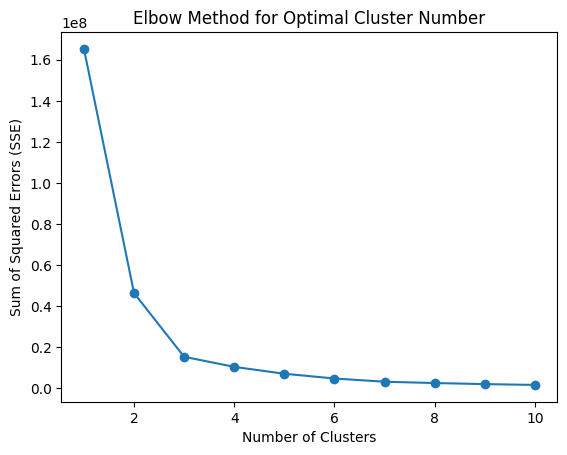

In [33]:
import matplotlib.pyplot as plt


stock1 = main_data["Close"]
stock1 = stock1.values.reshape(-1,1)

num_clusters_range = range(1, 11)
sse_values = []

for num_clusters in num_clusters_range:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(stock1)
    
    # Calculate SSE (inertia)
    sse = kmeans.inertia_
    sse_values.append(sse)

# Plotting the SSE values
plt.plot(num_clusters_range, sse_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

## Here we can conclude that optimal number of clusters can be 2 , but for more clearity we can use FPC 

# FPC (Fuzzy Partitioning Coefficients)

Number of clusters: 2, Fuzzy Partition Coefficient: 0.8035
Number of clusters: 3, Fuzzy Partition Coefficient: 0.7574
Number of clusters: 4, Fuzzy Partition Coefficient: 0.7421
Number of clusters: 5, Fuzzy Partition Coefficient: 0.7205
Number of clusters: 6, Fuzzy Partition Coefficient: 0.7153
Number of clusters: 7, Fuzzy Partition Coefficient: 0.7067
Number of clusters: 8, Fuzzy Partition Coefficient: 0.7116
Number of clusters: 9, Fuzzy Partition Coefficient: 0.7046


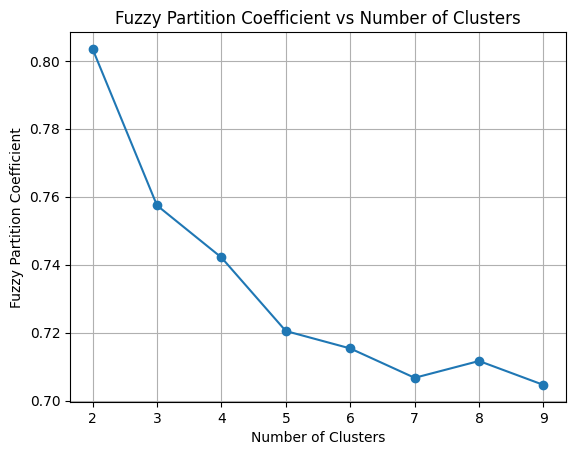

In [34]:
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

daily_returns_series = return_values


daily_returns_array = daily_returns_series.to_numpy().reshape(-1, 1)


scaler = StandardScaler()
standardized_returns = scaler.fit_transform(daily_returns_array)


num_clusters_range = range(2, 10)

# Initialize an empty list to store fuzzy partition coefficients
fuzzy_partition_coefficients = []

# Perform clustering and calculate fuzzy partition coefficient for different cluster counts
for num_clusters in num_clusters_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=standardized_returns.T, c=num_clusters, m=2, error=0.005, maxiter=1000
    )
    fuzzy_partition_coefficients.append(fpc)

    print(f"Number of clusters: {num_clusters}, Fuzzy Partition Coefficient: {fpc:.4f}")

# Plot the results
plt.figure()
plt.plot(num_clusters_range, fuzzy_partition_coefficients, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient')
plt.title('Fuzzy Partition Coefficient vs Number of Clusters')
plt.grid()
plt.show()


here we can clearly see that the optimal number of cluster is 2

# Applying the step by step algorithm

## 1. Data Splitting:
Split your daily returns data into training and test sets. Let's assume you want to use, for instance, 80% of the data for training and 20% for testing.

## 2. Clustering Model:
Fit a Fuzzy C-means clustering model on the training data to identify the clusters. Since you know you have two clusters, set num_clusters = 2.

## 3. Auto ARIMA Model for Each Cluster:
For each cluster:
Extract the daily returns corresponding to that cluster from the training data.
Fit an Auto ARIMA model to the extracted daily returns.

## 4. ARIMA Model Fitting:
Fit the ARIMA models for each cluster using their respective training data.

## 5. Cluster Prediction for Test Data:
Use the clustering model to predict the cluster labels for the test data based on their daily returns.

## 6. Predicting Prices for Each Cluster:
For each data point in the test data:
Determine the cluster it belongs to using the predicted cluster labels.
Use the corresponding ARIMA model to forecast the stock price for that cluster.

## 7. Ensemble Forecasted Prices:
Combine the forecasted prices from the two ARIMA models to create the ensemble forecast.

## 8. Comparison with Actual Data:
Compare the ensemble forecasted prices with the actual test data to evaluate the accuracy of your model.

1

In [35]:
# Train & Test Data
train_data = standardized_returns[ : int(0.8* len(standardized_returns))]
test_data = standardized_returns[int(0.8* len(standardized_returns)) : ]

2

In [36]:
# Fuzzy C-means clustering
num_clusters = 2            #number of optimal cluster is 2 which we have found earlier 
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=train_data.reshape(-1, 1).T, c=num_clusters, m=2, error=0.005, maxiter=1000
)

3

In [37]:
# Initialize lists to store ARIMA models and their orders
arima_orders = []
# Iterate over clusters
for cluster_id in range(num_clusters):
    cluster_returns = train_data[u[cluster_id] > 0.5]  # Extract daily returns for the cluster


    # Find optimal ARIMA order using pmdarima
    arima_order = auto_arima(cluster_returns, seasonal=False, trace=True, suppress_warnings=True).order
    arima_orders.append(arima_order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3991.465, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3433.721, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3655.624, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3283.462, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3176.616, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3140.525, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3118.093, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=2.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.81 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2947.347, Time=0.48 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2945.407, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2943.884, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2952.493, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2945.3

In [38]:
print("The best fitted model for the two clusters are",arima_orders)

The best fitted model for the two clusters are [(3, 0, 0), (4, 1, 2)]


4

In [39]:
# Initialize lists to store ARIMA models and their orders
arima_models = []
for cluster_id in range(num_clusters):
    cluster_returns = train_data[u[cluster_id] > 0.5]  # Extract daily returns for the cluster
    
    # Fit ARIMA model using the identified order
    arima_model = SARIMAX(cluster_returns, order=arima_orders[cluster_id])
    arima_fit = arima_model.fit()
    arima_models.append(arima_fit)

5

In [40]:
ensemble_forecast = []
for test_return in test_data:
    predicted_membership = fuzz.cluster.cmeans_predict(
        test_return.reshape(1, -1), cntr, 2, error=0.005, maxiter=1000
    )
    predicted_cluster = np.argmax(predicted_membership[0])
    
    # Forecast using the corresponding ARIMA model
    forecast = arima_models[predicted_cluster].get_forecast(steps=1)
    forecast_mean = forecast.predicted_mean[0]
    ensemble_forecast.append(forecast_mean)

In [41]:
import math
fuzzy_arima_mae = mean_absolute_error(test_data, ensemble_forecast)
fuzzy_arima_rmse = math.sqrt(mean_squared_error(test_data, ensemble_forecast))
fuzzy_arima_mse = mean_squared_error(test_data, ensemble_forecast)

print(f"MAE: {fuzzy_arima_mae:.4f}")
print(f"RMSE: {fuzzy_arima_rmse:.4f}")
print(f"MSE: {fuzzy_arima_mse:.4f}")

MAE: 0.4546
RMSE: 0.6545
MSE: 0.4284


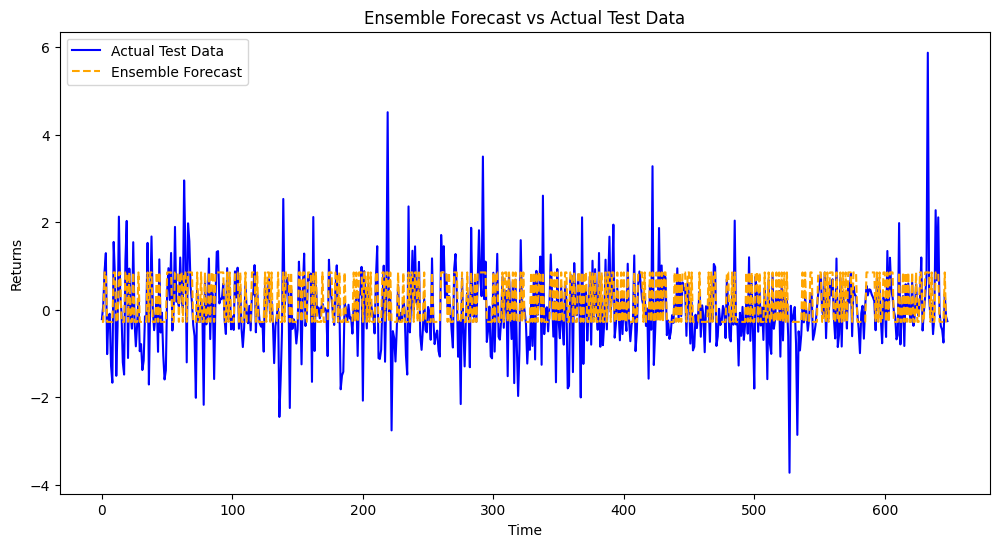

In [42]:
ensemble_forecast = np.array(ensemble_forecast)

# Plotting the predicted values and actual test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.reshape(-1,1), label='Actual Test Data', color='blue')
plt.plot(ensemble_forecast, label='Ensemble Forecast', color='orange', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Ensemble Forecast vs Actual Test Data')
plt.legend()
plt.show()

In [43]:
fuzzy_arima_metrics = pd.DataFrame([{"Model Name": "FUZZY-ARIMA",
    "RMSE": fuzzy_arima_rmse,
    "MSE": fuzzy_arima_mse,
    "MAE": fuzzy_arima_mae}])

In [44]:
Metrics_DF = pd.concat([Metrics_DF,fuzzy_arima_metrics], ignore_index= True)
Metrics_DF

,Model Name,RMSE,MSE,MAE
0,"ARMA(1,0,1)",0.016316,0.000266,0.011666
1,ARMA_ANN,0.014815,0.000219,0.010795
2,"GARCH(1,1)",0.022628,0.000512,0.018593
3,ARMA-GARCH,0.022628,0.000512,0.018584
4,ARMA-GARCH-ANN,0.014932,0.000223,0.010846
5,FUZZY-ARIMA,0.654525,0.428403,0.454631


> # `L.S.T.M `

In [21]:
data_training=pd.DataFrame(main_data["Close"][0:int(len(main_data)*0.80)])
data_test=pd.DataFrame(main_data['Close'][int(len(main_data)*0.80):int(len(main_data))])

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.11831037],
       [0.11455164],
       [0.10873456],
       ...,
       [0.9881868 ],
       [0.9982996 ],
       [0.98935026]])

In [24]:
data_training_array.shape

(2596, 1)

In [25]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(LSTM(units=40,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=25))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 40)           6720      
                                                                 
 dropout_2 (Dropout)         (None, 100, 40)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                18200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 26,221
Trainable params: 26,221
Non-trai

In [29]:
model.compile( optimizer='adam',loss='mean_squared_error')

In [30]:

model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


63/63 [==============================] - 7s 69ms/step - loss: 0.0327 - val_loss: 0.0027
Epoch 2/100
63/63 [==============================] - 4s 65ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 3/100
63/63 [==============================] - 4s 65ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 4/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 6/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 8/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/100
63/63 [==============================] - 4s 64ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 10/100
63/63 [==============================] - 4s 65ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 11/10

In [31]:
model.save('CIPLA.h5')

In [43]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_test,ignore_index=True)

C:\Users\chakr\AppData\Local\Temp\ipykernel_4496\60233251.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [44]:
input_data=scaler.fit_transform(final_df)

In [45]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [46]:
y_predicted=model.predict(x_test)

21/21 [==============================] - 0s 21ms/step


In [48]:
y_predicted=scaler.inverse_transform(y_predicted)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

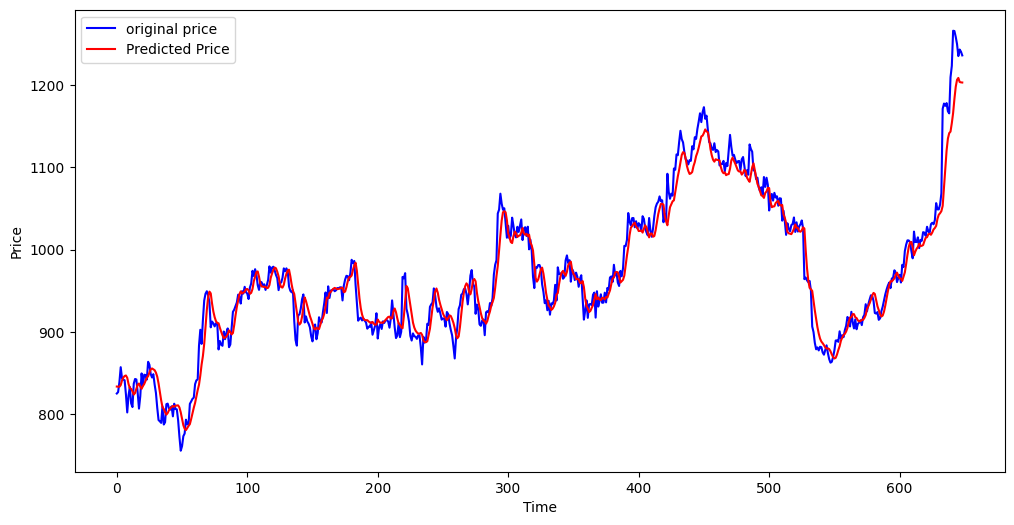

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

  
# calculate MAE,MSE,RMSE
error1 = mae(y_test, y_predicted)
error2=mse(y_test,y_predicted)
error3=np.sqrt(error2)

  
# display
print("Mean absolute error : " + str(error1))

print("Root Mean squared error : " + str(error3))

Mean absolute error : 14.350253300600684
Root Mean squared error : 20.159838338169976


> # `*Hybrid ARMA-GARCH & LSTM approach*`